# Fatality Analysis Reporting System
**Dataset description:** <br>
The FARS (Fatality Analysis Reporting System) data set is a compilation of statistics about car accidents made by the U.S. National Center for Statistics and Analysis.
The specific dataset used contains information about all of the people involved in car accidents in the U.S. during 2001, where most of its attributes are represented with nominal values. The class attribute describes the level of injury suffered.
- Type - Classification
- Size - 67312 instances
- Features - 29
- Classes - 8

**This is an interactive notebook!**
- Many cells written in this notebook are meant for re-use, so you can explore the data set by yourself step-by-step, then go back and see the effect running a cell had on the previous ones. 
- If however you just want to see the results, you can run the whole notebook with no problem. If you don't have the required packages and you don't want to install them, you can view the complete notebook and trained model on my [GitHub account](https://github.com/danbochman/FARS_LEARNING).


### Import Packages

In [1]:
%matplotlib inline

import itertools
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.externals import joblib
import matplotlib
import graphviz
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Preliminary Data Processing
The dataset came in a .out format, I processed it in Excel to reconstruct it to tabular form, and saved it as an .csv file

### Data Exploration

In [2]:
df = pd.read_csv("fars_train_proc.csv")
df.head()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,Illinois,30,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,606,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
1,Illinois,19,Female,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Restraint_Used_-_Type_Unknown,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Possible_Injury
2,Illinois,22,Male,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Left_Side,Restraint_Used_-_Type_Unknown,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),No_Injury
3,Illinois,17,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Restraint_Used_-_Type_Unknown,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),No_Injury
4,Illinois,17,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Right_Side,Restraint_Used_-_Type_Unknown,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),No_Injury


In [3]:
df.describe()

,AGE,ALCOHOL_TEST_RESULT,DRUG_TEST_RESULTS_(1_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_RESULTS_(3_of_3)
count,67312.000000,67312.000000,67312.000000,67312.000000,67312.000000
mean,37.198999,68.208848,202.198063,106.990150,103.405396
std,22.081759,42.273525,394.105348,305.368879,303.232578
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,16.000000,0.000000,0.000000,0.000000
50%,33.000000,96.000000,0.000000,0.000000,0.000000
75%,50.000000,96.000000,1.000000,0.000000,0.000000
max,99.000000,99.000000,999.000000,999.000000,999.000000


In [4]:
# Check for null values values
df.isnull().sum()

CASE_STATE                             0
AGE                                    0
SEX                                    0
PERSON_TYPE                            0
SEATING_POSITION                       0
RESTRAINT_SYSTEM-USE                   0
AIR_BAG_AVAILABILITY/DEPLOYMENT        0
EJECTION                               0
EJECTION_PATH                          0
EXTRICATION                            0
NON_MOTORIST_LOCATION                  0
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    0
METHOD_ALCOHOL_DETERMINATION           0
ALCOHOL_TEST_TYPE                      0
ALCOHOL_TEST_RESULT                    0
POLICE-REPORTED_DRUG_INVOLVEMENT       0
METHOD_OF_DRUG_DETERMINATION           0
DRUG_TEST_TYPE                         0
DRUG_TEST_RESULTS_(1_of_3)             0
DRUG_TEST_TYPE_(2_of_3)                0
DRUG_TEST_RESULTS_(2_of_3)             0
DRUG_TEST_TYPE_(3_of_3)                0
DRUG_TEST_RESULTS_(3_of_3)             0
HISPANIC_ORIGIN                        0
TAKEN_TO_HOSPITA

**Main obstacles that need to be addressed:**
1. Most of the columns' values are non-numeric, we need to encode it or use an algorithm that can deal with it efficiently
2. There are many values that are relevant only for certain conditions, for example: DRUG_TEST_RESULTS_(2_of_3) is relevant only if DRUG_TEST_TYPE_(2_of_3) was conducted. Zero values in these columns are actually N\A values.

## Feature Engineering

First let's look for candidates for feature merging or dropping

In [5]:
# Check classes balance
df['INJURY_SEVERITY'].value_counts()

Fatal_Injury                      28741
No_Injury                         12561
Incapaciting_Injury               10083
Nonincapaciting_Evident_Injury     9285
Possible_Injury                    5845
Unknown                             560
Injured_Severity_Unknown            231
Died_Prior_to_Accident                6
Name: INJURY_SEVERITY, dtype: int64

- **Died_Prior_to Accident** shows only 6 times out of 100967 data examples. This classification is a lost cause and it's better to drop it.
- **Injured_Severity_Unknown**, **Unknown** and **Possible_Injury** practically mean the same thing. It doesn't make sense to train the algorithm to predict when injury severities will be unknown, when in doubt - there's a possibility for injury. I would merge the terms to make a more robust class. By doing so we'll also gain more balance between the classes count, avoiding skewed classes.

In [6]:
# Class merge and drop
df.INJURY_SEVERITY.replace(['Unknown', 'Injured_Severity_Unknown'], 'Possible_Injury', inplace=True) # merge classes
df = df[df.INJURY_SEVERITY != 'Died_Prior_to_Accident'] # drop class

In [7]:
# Check number of distinct occurrences for values in a column 
df['SEX'].value_counts() # Memo:  SEX, ALCOHOL_TEST_RESULT, DRUG_TEST_RESULTS_(1_of_3), HISPANIC_ORIGIN, RACE

Male       43767
Female     22478
Unknown     1061
Name: SEX, dtype: int64

In [8]:
# Estimate correlation between a certain category value and injury severity
category = 'SEX'                                     # Memo: 'RACE' - 'Not_a_Fatality_(Not_Applicable)'
value = 'Unknown'
dcorr = df.loc[df[category] == value]     # For specific category
# dcorr = train_data.loc[df['column_name'].isin(some_values)] # For several categories

print('Injury severity distribution for ' + category + " - " + str(value))
dcorr['INJURY_SEVERITY'].value_counts()

Injury severity distribution for SEX - Unknown


Possible_Injury                   515
No_Injury                         460
Fatal_Injury                       69
Nonincapaciting_Evident_Injury     10
Incapaciting_Injury                 7
Name: INJURY_SEVERITY, dtype: int64

### Compressing the data from police reports, test types and test results
I contemplated much about what to do with police reports and test types for alcohol\drug involvement, they seem like redundant features next to the numeric test results that already convey this information.The biggest problem arises when a person wasn't involved with drugs at all, they will have features: 
1. POLICE-REPORTED_DRUG_INVOLVEMENT - No_Drugs	
2. METHOD_OF_DRUG_DETERMINATION - Not_Reported
3. DRUG_TEST_TYPE - Not_Tested_for_Drugs
4. DRUG_TEST_RESULTS_(1_of_3) - 0 (for 65% of instances)
5. DRUG_TEST_TYPE_(2_of_3) - Not_Tested_for_Drugs
6. DRUG_TEST_RESULTS_(2_of_3) - 0 (for 88% of instances)
7. DRUG_TEST_TYPE_(3_of_3) - Not_Tested_for_Drugs
8. DRUG_TEST_RESULTS_(3_of_3) - 0 (for 88% of instances)

Meaning they will have 8 redundant features contributing a lot of degrees-of-freedom that can help the model overfit the data.
To preserve as much information as possible I decided to to keep\make these columns:
- ALCOHOL_TEST_TYPE - kept as is, 53% of values are "Not_Tested_for_Alcohol", not ideal but I'll keep for now
- ALCOHOL_TEST_RESULT - kept as is
- DRUG_TEST_COUNT - # of drug test conducted 
- DRUG_TEST_RESULTS_AVG - average score of tests conducted

Police reports and drug test types will be dropped. I mostly feel bad for dropping drug test types because maybe they convey some information about the reliability of the test results; however, for at least 65% examples in the data set these columns are irrelevant, so we need to think about the what's best for the model overall. 

**Making the changes:** 

In [9]:
# Counting how many drug tests were conducted
df['DRUG_TEST_COUNT'] = (df[['DRUG_TEST_RESULTS_(1_of_3)','DRUG_TEST_RESULTS_(2_of_3)','DRUG_TEST_RESULTS_(3_of_3)']] != 0).sum(axis=1)
# Averaging test results only excluding zeros by replacing them with NaN for the calculation
df['DRUG_TEST_RESULTS_AVG'] = (df[['DRUG_TEST_RESULTS_(1_of_3)','DRUG_TEST_RESULTS_(2_of_3)','DRUG_TEST_RESULTS_(3_of_3)']].replace(0, np.NaN).mean(axis=1))
# Returning NaN to Zeros 
df['DRUG_TEST_RESULTS_AVG'].fillna(0, inplace=True)

In [10]:
# Drop processed columns
df.drop(columns=['DRUG_TEST_RESULTS_(1_of_3)','DRUG_TEST_RESULTS_(2_of_3)','DRUG_TEST_RESULTS_(3_of_3)',
                 'POLICE-REPORTED_DRUG_INVOLVEMENT','METHOD_OF_DRUG_DETERMINATION','DRUG_TEST_TYPE',
                 'DRUG_TEST_TYPE_(2_of_3)','DRUG_TEST_TYPE_(3_of_3)','POLICE_REPORTED_ALCOHOL_INVOLVEMENT',
                 'METHOD_ALCOHOL_DETERMINATION'], inplace=True)

### HISPANIC_ORIGIN & RACE
'HISPANICE_ORIGIN' is a column separated from 'RACE'. [It seems the USA has strict rules about these classifications](https://www.iowadatacenter.org/aboutdata/raceclassification). These columns however create a problem when the person in question is 'Not_a_Fatality_(Not_Applicable)' or 'Unknown', which is 76% of the time, and this creates a duplicate on both columns:

In [11]:
df_ethnic = df[['HISPANIC_ORIGIN', 'RACE']]
df_ethnic.head(25)

,HISPANIC_ORIGIN,RACE
0,Non-Hispanic,Black
1,Not_a_Fatality_(Not_Applicable),Not_a_Fatality_(Not_Applicable)
2,Not_a_Fatality_(Not_Applicable),Not_a_Fatality_(Not_Applicable)
3,Not_a_Fatality_(Not_Applicable),Not_a_Fatality_(Not_Applicable)
4,Not_a_Fatality_(Not_Applicable),Not_a_Fatality_(Not_Applicable)
5,Not_a_Fatality_(Not_Applicable),Not_a_Fatality_(Not_Applicable)
6,Not_a_Fatality_(Not_Applicable),Not_a_Fatality_(Not_Applicable)
7,Non-Hispanic,White
8,Not_a_Fatality_(Not_Applicable),Not_a_Fatality_(Not_Applicable)
9,Not_a_Fatality_(Not_Applicable),Not_a_Fatality_(Not_Applicable)


What I wanna do to address this problem is merge the two columns to 'RACE_ETHNICITY' and create a category 'Hispanic' for any non-negative category under 'HISPANIC_ORIGIN'. So a 'Central_or_South_American'+'White' will be overwritten as 'Hispanic'. (Sorry white central or south americans...)

In [12]:
ethnics = df.HISPANIC_ORIGIN.unique() # Get a list of all the possible categories under 'HISPANIC_ORIGIN'

# Keep only non-negative categories
ethnics = [e for e in ethnics if e not in ('Not_a_Fatality_(Not_Applicable)', 'Non-Hispanic','Unknown')]
df['HISPANIC_ORIGIN'] = df['HISPANIC_ORIGIN'].replace(ethnics, 'Hispanic')

# I couldn't think of an elegant solution in pandas so I switched the categories with python tools
RACE_ETHNICITY_zip = zip(list(df['HISPANIC_ORIGIN']), list(df['RACE']))
RACE_ETHNICITY = []
for tpl in RACE_ETHNICITY_zip:
    if tpl[0] == 'Hispanic':
        RACE_ETHNICITY.append(tpl[0])
    else:
        RACE_ETHNICITY.append(tpl[1])

df['RACE_ETHNICITY'] = RACE_ETHNICITY     # Create the new column
df.drop(columns=['HISPANIC_ORIGIN','RACE'], inplace=True) # Drop the merged columns

In [13]:
# Let's take a look at the new column
df['RACE_ETHNICITY'].value_counts()

Not_a_Fatality_(Not_Applicable)                               38399
White                                                         12863
Unknown                                                       12473
Black                                                          2191
Hispanic                                                        852
American_Indian_(_Includes_Aleuts_and_Eskimos)                  278
Filipino                                                         65
Other_Asian_or_Pacific_Islander                                  44
Vietnamese                                                       28
Chinese                                                          27
Asian_Indian                                                     23
Asian_or_Pacific_Islander_No_Specific_(Individual)_Race          16
Korean                                                           12
Japanese                                                         10
Other_Indian_(Includes_South_and_Central_America

### RELATED_FACTOR_(#)-PERSON_LEVEL
These columns seem to be contain the same categories, which are comments about special circumstances in the accident:

In [14]:
# Check number of distinct occurrences for values in a column - Continued
df['RELATED_FACTOR_(1)-PERSON_LEVEL'].value_counts()

Not_Applicable_-_Driver/None_-_All_Other_Persons                                                                                     64690
Walking/Riding_with_or_Against_Traffic_Playing_Working_Sitting_Lying_Standing_etc._in_Roadway                                          736
Improper_Crossing_or_Roadway_or_Intersection                                                                                           569
Darting_Stumbling_or_Running_into_Road                                                                                                 348
Not_Visible                                                                                                                            310
Failure_to_Yield_Right_of_Way                                                                                                          210
Unknown                                                                                                                                187
Inattentive_(talking_Eating

In [15]:
# Estimate correlation between a certain category value and injury severity
category = 'RELATED_FACTOR_(1)-PERSON_LEVEL'
value = 'Improper_Crossing_or_Roadway_or_Intersection'
dcorr = df.loc[df[category] == value]     # For specific category
# dcorr = train_data.loc[df['column_name'].isin(some_values)] # For several categories

print('Injury severity distribution for ' + category + " - " + str(value))
dcorr['INJURY_SEVERITY'].value_counts()

Injury severity distribution for RELATED_FACTOR_(1)-PERSON_LEVEL - Improper_Crossing_or_Roadway_or_Intersection


Fatal_Injury                      555
Incapaciting_Injury                 7
Nonincapaciting_Evident_Injury      4
Possible_Injury                     3
Name: INJURY_SEVERITY, dtype: int64

They are rarely used, but some convey strong information about the severity of injury as shown above, and I don't want to lose this information. I will approach this problem by one-hot-encoding the categories and then merging duplicates, but first I need to prepare the data for one-hot-encoding. 

## Thresholding Values in Columns by Counts
A recurrent problem with this dataset are rare categories; one-hot-encoding will create a new feature for every rare category, and this will create many redundant parameters. I will deal with this by setting a count threshold. Categories that are counted more times than the  threshold will be kept as is, others will be labeled as 'rare'. The count threshold will be a hyperparamter for this model as it is hard to predict what will be the best value for it.

In [16]:
# Deciding the inital threshold to be 1% of dataset size
tot_instances = df.shape[0]
threshold = tot_instances*0.005
print ('The minimum count threshold is: '+str(threshold))

The minimum count threshold is: 336.53000000000003


In [17]:
# Apply the count threshold to all the categorical values
obj_columns = list(df.select_dtypes(include=['object']).columns)    # Get a list of all the columns' names with object dtype
obj_columns.remove('INJURY_SEVERITY')                               # If you chose to keep rare classes
df = df.apply(lambda x: x.mask(x.map(x.value_counts())<threshold, 'RARE') if x.name in obj_columns else x)

### One Hot Encoding
I have done all the feature engineering I think was appropriate for this dataset, now it's ready to be one-hot-encoded so we can:
1. Merge the duplicate categories that came from RELATED_FACTOR_(#)-PERSON_LEVEL
2. Feed the data to a machine learning algorithm

In [18]:
# One Hot Encode the categorical features in the dataset

df_encoded = pd.get_dummies(data=df, columns=obj_columns)
df_encoded.dtypes

AGE                                                                                                                                int64
ALCOHOL_TEST_RESULT                                                                                                                int64
INJURY_SEVERITY                                                                                                                   object
DRUG_TEST_COUNT                                                                                                                    int64
DRUG_TEST_RESULTS_AVG                                                                                                            float64
CASE_STATE_Illinois                                                                                                                uint8
CASE_STATE_Indiana                                                                                                                 uint8
CASE_STATE_Iowa                          

In [19]:
# Merge duplicates from RELATED_FACTOR_(#)-PERSON_LEVEL
df_encoded['RELATED_FACTOR_RARE'] = df_encoded['RELATED_FACTOR_(1)-PERSON_LEVEL_RARE'] + df_encoded['RELATED_FACTOR_(2)-PERSON_LEVEL_RARE'] + df_encoded['RELATED_FACTOR_(3)-PERSON_LEVEL_RARE']
df_encoded['RELATED_FACTOR_Not_Applicable'] = df_encoded['RELATED_FACTOR_(1)-PERSON_LEVEL_Not_Applicable_-_Driver/None_-_All_Other_Persons'] + df_encoded['RELATED_FACTOR_(2)-PERSON_LEVEL_Not_Applicable_-_Driver/None_-_All_Other_Persons'] + df_encoded['RELATED_FACTOR_(3)-PERSON_LEVEL_Not_Applicable_-_Driver/None_-_All_Other_Persons']
# Drop what we merged
df_encoded.drop(columns=['RELATED_FACTOR_(1)-PERSON_LEVEL_RARE',
                 'RELATED_FACTOR_(2)-PERSON_LEVEL_RARE',
                 'RELATED_FACTOR_(3)-PERSON_LEVEL_RARE', 
                 'RELATED_FACTOR_(1)-PERSON_LEVEL_Not_Applicable_-_Driver/None_-_All_Other_Persons',
                 'RELATED_FACTOR_(2)-PERSON_LEVEL_Not_Applicable_-_Driver/None_-_All_Other_Persons',
                 'RELATED_FACTOR_(3)-PERSON_LEVEL_Not_Applicable_-_Driver/None_-_All_Other_Persons'], inplace=True)

In [20]:
# Validate the new features
df_encoded.head()

,AGE,ALCOHOL_TEST_RESULT,INJURY_SEVERITY,DRUG_TEST_COUNT,DRUG_TEST_RESULTS_AVG,CASE_STATE_Illinois,CASE_STATE_Indiana,CASE_STATE_Iowa,CASE_STATE_Kansas,CASE_STATE_Kentucky,...,RELATED_FACTOR_(1)-PERSON_LEVEL_Improper_Crossing_or_Roadway_or_Intersection,RELATED_FACTOR_(1)-PERSON_LEVEL_Walking/Riding_with_or_Against_Traffic_Playing_Working_Sitting_Lying_Standing_etc._in_Roadway,RACE_ETHNICITY_Black,RACE_ETHNICITY_Hispanic,RACE_ETHNICITY_Not_a_Fatality_(Not_Applicable),RACE_ETHNICITY_RARE,RACE_ETHNICITY_Unknown,RACE_ETHNICITY_White,RELATED_FACTOR_RARE,RELATED_FACTOR_Not_Applicable
0,30,0,Fatal_Injury,2,506.5,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
1,19,96,Possible_Injury,0,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
2,22,96,No_Injury,0,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,17,96,No_Injury,0,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
4,17,96,No_Injury,0,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3


In [21]:
# Split the dataset to X and Y for model fit
X_orig = df_encoded.dropna()     # Remember that df is the train+test data so dropping NaN values will return the train data
Y_orig = X_orig['INJURY_SEVERITY']      # Set the target column
X_orig = X_orig.drop('INJURY_SEVERITY', axis=1)      # Remove the target column from the training data
X_test = df_encoded[df_encoded['INJURY_SEVERITY'].isnull()]
X_test = X_test.drop('INJURY_SEVERITY', axis=1)

In [22]:
# Encode the target classes to numbers with sklearn LabelEncoder if the target numbers don't matter
# le = preprocessing.LabelEncoder()
# le.fit(Y_orig)
# le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))  # this will help us translate the predictions
# Y_encoded = le.transform(Y_orig)
# print(le_name_mapping)

In [23]:
# Encode the target classes to specific requested numbers (for competitions\tests)
class_dict = {'Possible_Injury': 0, 'No_Injury': 1, 'Fatal_Injury': 2,
              'Nonincapaciting_Evident_Injury': 3, 'Incapaciting_Injury': 4}
Y_orig = pd.DataFrame(Y_orig)
Y_encoded = Y_orig.replace({'INJURY_SEVERITY' : class_dict})

In [24]:
# Split the data set to train and dev sets
X_train, X_dev, Y_train, Y_dev = train_test_split(X_orig, Y_encoded, test_size=0.2, random_state=42)
# Note: train_test_split() already shuffles the dataset

## Fitting the Model
**Phew! Finally the pre-processing of the data is complete!** <br>
Now the dataset is ready to be fed to a machine learning algorithm of choice. Right now, XGBoost is considered to be the best general purpose algorithm when it comes to general regression and classification tasks. Since it doesn't seem like this problem could benefit from a deep neural network solution, I will stick with the popular choice.

In [25]:
# Convert that data to the XGBoost specific DMatrix data format
Dtrain = xgb.DMatrix(X_train, label=Y_train)
Ddev = xgb.DMatrix(X_dev, label=Y_dev)
Dcv = xgb.DMatrix(X_orig, label=Y_encoded)   # For cross-validation

In [26]:
# Set the paramaters for the model
num_class = len(np.unique(Y_train))
param = {                              # General guidelines for initial paramaters:
    'min_child_weight': 1,             # 1 (choose small for high class imbalance)
    'gamma': 0.5,                        # 0.1-0.2
    'lambda': 10,                       # L2 Regulariztion - default = 1
    'scale_pos_weight': 1,             # 1 (choose small for high class imbalance)
    'subsample': 0.6,                    # 0.5-0.9
    'colsample_bytree': 0.8,             # 0.5-0.9
    'colsample_bylevel': 0.7,              # 0.5-0.9
    'max_depth': 5,                    # 3-10 
    'eta': 0.1,                        # 0.05-0.3
    'silent': 0,                       # 0 - prints progress    1 - quiet
    'objective': 'multi:softmax',        
    'num_class': num_class,             
    'eval_metric': 'mlogloss'}  
num_round = 1000                                      # the number of training iterations if not stopped early
evallist = [(Dtrain, 'train'), (Ddev, 'eval')]        # Specify validation set to watch performance

In [27]:
# Train the model on the training set to get an initial impression on the performance
model = xgb.train(param, Dtrain, num_round, evallist, early_stopping_rounds=10)
print("Best error: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

[0]	train-mlogloss:1.44941	eval-mlogloss:1.44991
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 10 rounds.
[1]	train-mlogloss:1.32658	eval-mlogloss:1.32724
[2]	train-mlogloss:1.22617	eval-mlogloss:1.22705
[3]	train-mlogloss:1.13832	eval-mlogloss:1.13948
[4]	train-mlogloss:1.07604	eval-mlogloss:1.07736
[5]	train-mlogloss:1.01083	eval-mlogloss:1.01214
[6]	train-mlogloss:0.953219	eval-mlogloss:0.954542
[7]	train-mlogloss:0.902803	eval-mlogloss:0.903991
[8]	train-mlogloss:0.858164	eval-mlogloss:0.859509
[9]	train-mlogloss:0.81917	eval-mlogloss:0.820317
[10]	train-mlogloss:0.783591	eval-mlogloss:0.784707
[11]	train-mlogloss:0.754543	eval-mlogloss:0.755357
[12]	train-mlogloss:0.727136	eval-mlogloss:0.727879
[13]	train-mlogloss:0.702468	eval-mlogloss:0.703139
[14]	train-mlogloss:0.680619	eval-mlogloss:0.681158
[15]	train-mlogloss:0.659453	eval-mlogloss:0.659989
[16]	train-mlogloss:0.640224	eval-mloglo

[155]	train-mlogloss:0.409415	eval-mlogloss:0.417086
[156]	train-mlogloss:0.409316	eval-mlogloss:0.417074
[157]	train-mlogloss:0.40917	eval-mlogloss:0.416977
[158]	train-mlogloss:0.40903	eval-mlogloss:0.416905
[159]	train-mlogloss:0.408923	eval-mlogloss:0.416876
[160]	train-mlogloss:0.408791	eval-mlogloss:0.416838
[161]	train-mlogloss:0.408658	eval-mlogloss:0.416819
[162]	train-mlogloss:0.408573	eval-mlogloss:0.416791
[163]	train-mlogloss:0.408433	eval-mlogloss:0.416773
[164]	train-mlogloss:0.408295	eval-mlogloss:0.416751
[165]	train-mlogloss:0.408168	eval-mlogloss:0.416704
[166]	train-mlogloss:0.408053	eval-mlogloss:0.416681
[167]	train-mlogloss:0.407878	eval-mlogloss:0.416616
[168]	train-mlogloss:0.407772	eval-mlogloss:0.416541
[169]	train-mlogloss:0.407638	eval-mlogloss:0.416476
[170]	train-mlogloss:0.407536	eval-mlogloss:0.416451
[171]	train-mlogloss:0.407413	eval-mlogloss:0.416413
[172]	train-mlogloss:0.407301	eval-mlogloss:0.416398
[173]	train-mlogloss:0.407147	eval-mlogloss:0.41

### Tuning the Model's Hyperparameters
The default values of XGB paramaters do a decent job but maybe it's possible to improve the model's performance with some hyperparameter tuning. It's very difficult to tune a XGB model because many of the parameters are not orthogonal and changing one may effect the performance of another. I believe the best way to approach XGB tuning is via randomized grid search cross validation.

In [28]:
# # Tune the hyperparameters by random grid search cv (this should take about 2.5 hours)

# clf = xgb.XGBClassifier()

# param_grid = {
#         'max_depth': [3, 5, 7, 9],
#         'learning_rate': [0.1, 0.03, 0.01, 0.003],
#         'subsample': [0.6, 0.7, 0.8, 0.9],
#         'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
#         'colsample_bylevel': [0.6, 0.7, 0.8, 0.9],
#         'min_child_weight': [0.5, 1.0, 3.0, 5.0],
#         'gamma': [0, 0.25, 0.5, 1.0],
#         'reg_lambda': [0.1, 1.0, 5.0, 10.0],
#         'n_estimators': [300]}

# fit_params = {'eval_metric': 'mlogloss',
#               'early_stopping_rounds': 10,
#               'eval_set': [(X_dev, Y_dev.values.ravel())]}

# rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=10,
#                             n_jobs=1, cv=2,
#                             refit=False)

# print("Randomized search..")
# search_time_start = time.time()
# rs_clf.fit(X_train, Y_train.values.ravel(), **fit_params)
# print("Randomized search time:", time.time() - search_time_start)

# best_score = rs_clf.best_score_
# best_params = rs_clf.best_params_
# print("Best score: {}".format(best_score))
# print("Best params: ")
# for param_name in sorted(best_params.keys()):
#     print('%s: %r' % (param_name, best_params[param_name]))

In [29]:
# OPTIONAL - save the model for future predictions
# joblib.dump(model, 'fars_model_v2.pkl', compress=False)
# model = joblib.load('fars_model_v2.pkl') # to load it 

### Error Analysis
We tuned the model's parameters the best we could, now it's time to take a deeper look at the predictions it makes and see what kind of mistakes the model does to get inspiration on what more we can do to improve the model. 

In [30]:
# # Estimate error using XGBoost's own cross-validation
# cv_results = xgb.cv(
#     param,
#     Dcv,
#     num_boost_round=num_round,
#     seed=42,
#     nfold=5,
#     metrics={'merror'},
#     early_stopping_rounds=10)

# cv_results

In [31]:
# # Predict the classes on the training set with the trained model
train_pred = model.predict(Dtrain)

# Predict the classes on the dev set
dev_pred = model.predict(Ddev)

# Check model accuracy on the dev and train set
print ('Training Set Accuracy: ' + str((accuracy_score(Y_train, train_pred))))
print ('Dev Set Accuracy: ' + str((accuracy_score(Y_dev, dev_pred))))



Training Set Accuracy: 0.8234529381175247
Dev Set Accuracy: 0.8116921705541524


81% percent accuracy is a pretty decent result. Why do I think so? I try to think about the expected performance of a human expert looking at this data, trying to predict the injury severity of an accident, and I imagine his accuracy to be similar. However, this is merely intuition.

Accuracy is not an ideal metric for unbalanced classes like we have in this dataset, let's have a deeper look at the predictions the model made with a confusion matrix:

In [32]:
# Setting up the confusion matrix plot function
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

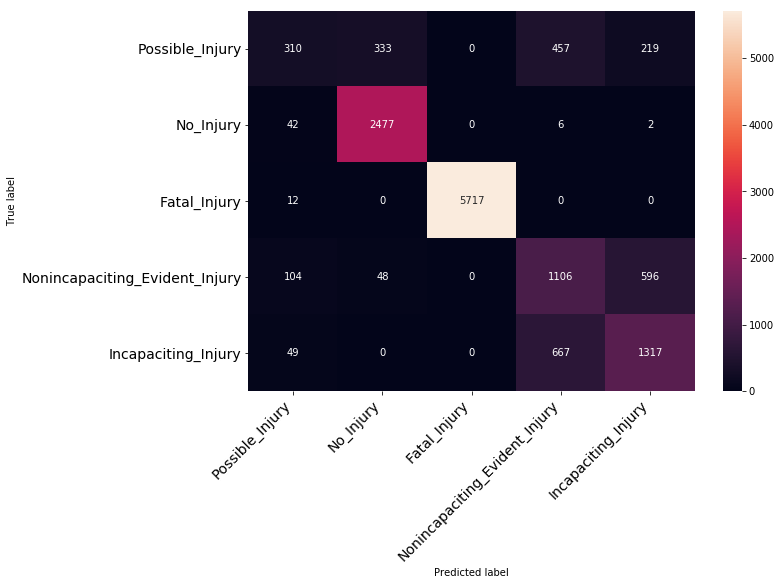

In [33]:
# Compute and plot the confusion matrix
cnf_matrix = confusion_matrix(Y_dev, dev_pred)
print_confusion_matrix(cnf_matrix, class_dict.keys())

Looking at the confusion matrix, it seems the model classifies 'Fatal_Injury' (99.8%) and 'No_Injury' (98.0%) extremely well! But it struggles with the intermediate classes. The most problematic class for the algorithm to classify correctly is 'Possible Injury' (30.1%), I am very pleased about this result because it shows just how much it would've been difficult to correctly classify it without merging it with the 2 other classes!

### How to Further Improve the Model
I believe the most meaningful way to further improve this model is by doing better feature engineering. I made some choices to merge\drop the columns, I decided on a 0.5% frequency threshold to drop the categories, performed one-hot-encoding on the categorical data. Maybe there was a better way to rearrange the data. Since I made this case-study for presentation purposes, and not for competition\work, I will stop the process here.

### Extracting Insights
We have built a model that can predict injury severity when fed the appropriate features. We can derive even more valuable information about this field by looking at what the machine have learned!
Let's see what we kind of applicable insights we can extract by examining the feature importance from the trained model:

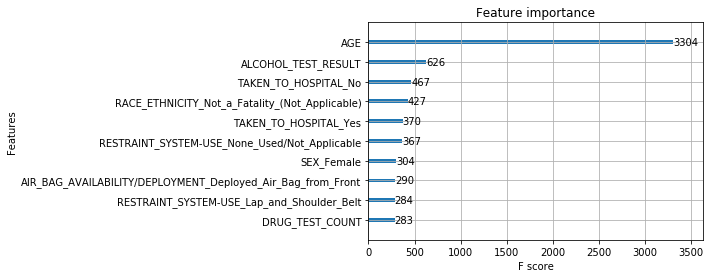

In [34]:
# Plot the 10 most important features in the model
xgb.plot_importance(model, max_num_features = 10, importance_type='weight') # also useful to look at 'gain'
plt.show()

- It's great to see the feature importance correlates nicely with common sense. We see that **AGE** has the biggest impact on the model predictions. Other important features: **Alcohol use, medical care, restraint system and air bag deployment**. These are all very intuitive features that we (humans) also think are important factors. <br>
- **'RACE_ETHNICITY_Not_a_Fatality...'** scores high on this list because it easily separates the non-'Fatal_Injury' from the rest of the classes
- **TAKEN_TO_HOSPITAL** an intuitive filter for injury severity
- **SEX_Female** was shown earlier to have significantly less fatal injuries and the algorithm picked up on that
- **DRUG_TEST_COUNT** - this is a suprising appearance! I was sure that the drug test results would be more important but it seems the information about having several or none drug tests have more of an impact on prediction! Luckily I saved that information in this column.

# Conclusions

We covered the FARS (Fatality Analysis Reporting System) data set which contained statistics about car accidents made by the U.S. National Center for Statistics and Analysis. The data set contained a mix of numeric and categorical data. It was structured in a way that was supposed to be ergonomic for the human user but it was a difficult format for machine learning.

In this case study we used the following machine learning techniques: 
- **Feature Engineering:** dropping overlapping classes, synthetizing new columns by merging existing columns, dropping columns that repeated information or contained information that was too specific, setting a threshold for distinct values count.
- **One Hot Encoding:** categorical data was handled using OHE, this technique was also used as a solution to merge duplicate categories from different columns
- **XGBoost:** we utillized an optimized distributed gradient boosting library, which implements machine learning algorithms under the Gradient Boosting framework.
- **Hyperparameter Tuning via RandomizedSearchCV**
- ***Quantitative* and *Qualitative*** error analysis on the model's prediction and mistakes

We have learned applicable insights from the data about important factors for car accident related injury: <br>
**Age** is the most dominant characteristic for determining injury severity in car accidents followed by **Alcohol\Drug involvement, gender, restraint system usage and air bag deployment**

These insights can be used for business purposes (Insurance companies policies) or education!

<br>
<br>

## About the Author
Hello! I hope you enjoyed this case study!

My name is Dan Bochman, <br>
I enjoy making content that can help fellow data science enthusiasts get into the field. I'm trying to put the focus on topics that were difficult for me to understand, and that I didn't find much sources to learn from on them.

If you have any questions for me regarding this work, or just want to contact me you can:  <br>
Send me an e-mail at: dannybochman@gmail.com <br>
Connect with me on [LinkedIn](https://www.linkedin.com/in/danbochman/) <br>
Check out my [GitHub account](https://github.com/danbochman) <br>